# LAB 3 PART 1: Assignment 1, 

Author: Aliprandi Francesco

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/NARMA10.csv", header=None)
X, Y =  torch.tensor(df.iloc[0]),  torch.tensor(df.iloc[1])

X.shape, Y.shape

(torch.Size([10000]), torch.Size([10000]))

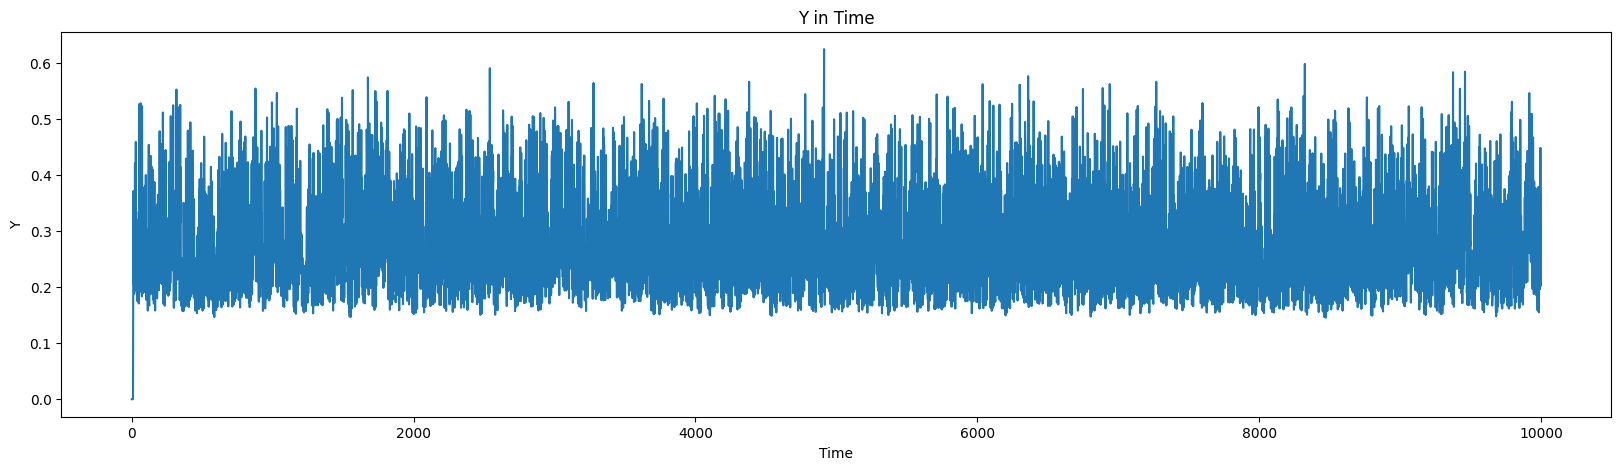

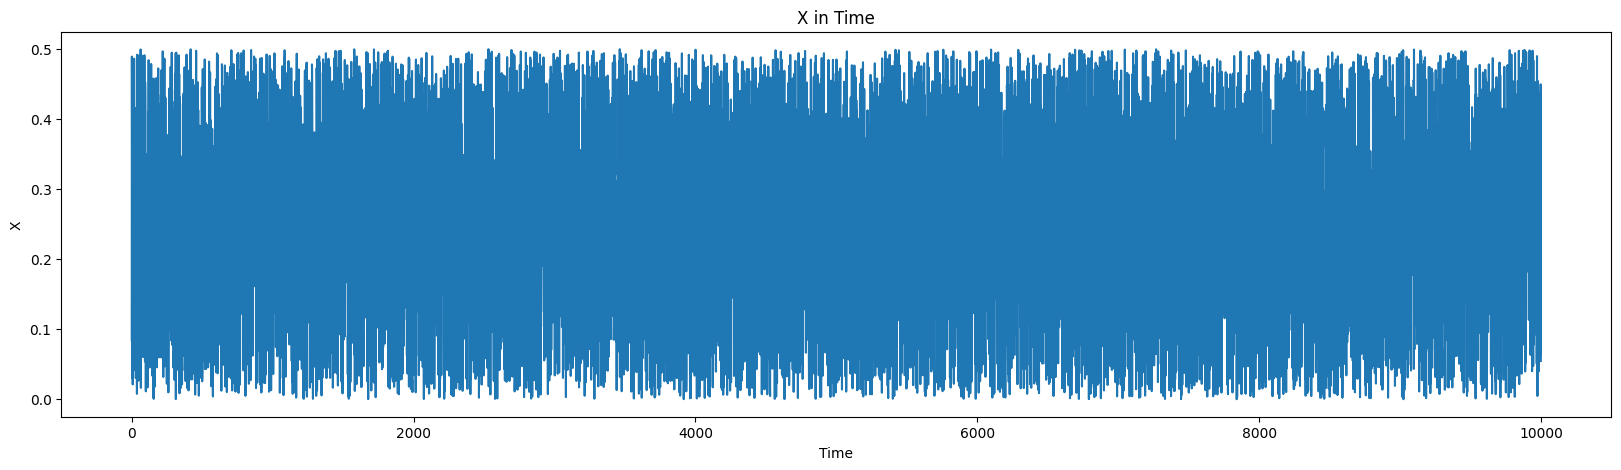

In [2]:
time = torch.arange(0, X.shape[0])

plt.figure(figsize=(20, 5))
plt.plot(time, Y)
plt.title("Y in Time")
plt.xlabel("Time")
plt.ylabel("Y")
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(time, X)
plt.title("X in Time")
plt.xlabel("Time")
plt.ylabel("X")
plt.show()
    

### Data Split

In [3]:
x_train, x_val, x_test = X[:4000], X[4000:5000], X[5000:]
y_train, y_val, y_test = X[:4000], X[4000:5000], X[5000:]


x_train.shape, x_val.shape, x_test.shape

(torch.Size([4000]), torch.Size([1000]), torch.Size([5000]))

In [4]:
from models import TimeDelayNN

tdnn = TimeDelayNN()
print(tdnn)
# y = tdnn(x_train.reshape(1, 1, -1).float())

TimeDelayNN(
  (conv0): Conv1d(1, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (activation0): ReLU()
  (conv1): Conv1d(32, 64, kernel_size=(5,), stride=(1,), padding=(4,), dilation=(2,))
  (activation1): ReLU()
  (conv2): Conv1d(64, 128, kernel_size=(7,), stride=(1,), padding=(9,), dilation=(3,))
  (activation2): ReLU()
  (fc1): Linear(in_features=128, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
)


In [5]:
x_train = x_train.reshape(1, 1, -1).float()
x_val = x_val.reshape(1, 1, -1).float()
y_train = y_train.reshape(1, -1, 1).float()
y_val = y_val.reshape(1, -1, 1).float()


t_history, v_history = tdnn.fit(x_train, y_train, x_val, y_val, epochs = 100, verbose=True)

Epoch 10/100, Train Loss: 0.02865048684179783, Val Loss: 0.02364506758749485
Epoch 20/100, Train Loss: 0.021301928907632828, Val Loss: 0.02106139436364174
Epoch 30/100, Train Loss: 0.019691141322255135, Val Loss: 0.020463015884160995
Epoch 40/100, Train Loss: 0.019325198605656624, Val Loss: 0.020115675404667854
Epoch 50/100, Train Loss: 0.01825043186545372, Val Loss: 0.018834004178643227
Epoch 60/100, Train Loss: 0.0167243555188179, Val Loss: 0.01720629818737507
Epoch 70/100, Train Loss: 0.013968054205179214, Val Loss: 0.014215718023478985
Epoch 80/100, Train Loss: 0.00930685643106699, Val Loss: 0.009245259687304497
Epoch 90/100, Train Loss: 0.0033849882893264294, Val Loss: 0.0031777943950146437
Epoch 100/100, Train Loss: 0.0005248712259344757, Val Loss: 0.0007145340205170214


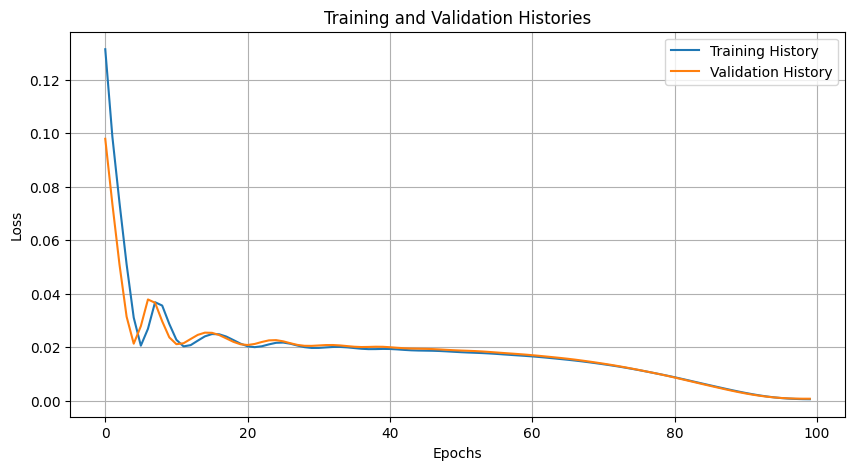

In [6]:
def plot_histories(t_history, v_history):
    plt.figure(figsize=(10, 5))
    plt.plot(t_history, label='Training History')
    plt.plot(v_history, label='Validation History')
    plt.title('Training and Validation Histories')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function
plot_histories(t_history, v_history)